In [1]:
import os, sys
project_root_dir = os.path.join(os.getcwd(),'..')
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)

import torch, config
import IPDL
import numpy as np

In [70]:
import pandas as pd

data_dir = '/home/abian/Descargas/Data/MI/'
exp = {'NPNE': '1624281450.473845',
       'NPCE': '1624278833.9127157',
       'PFCAE': '1623159385.3514383',
       'PCAES': '1623154255.9016886',
       'PCAE': '1623147073.627105'}

In [119]:
from IPDL.utils import moving_average
def show_ip(ip_df: pd.DataFrame, n=25, labels=[], moving_average_n=25, figsize=(7,6)):
    '''
        Create a Information Plane illustration

        Parameters
        ----------
        ip_df : pd.Dataframe, dataframe which contains the MI. This dataframe
            has a specific structure which is created from IPDL.InformationPlane class
        n: int, Number of samples to visualize, sampling generated by a log-scale
    '''
    colors = ['Greys', 'Reds', 'Blues', 'Greens', 'Oranges',
                'Purples', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd',
                'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn',
                'BuGn', 'YlGn']

    with plt.style.context('seaborn'):
        fig = plt.figure(constrained_layout=False, figsize=figsize)
        gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.08, right=0.84, wspace=0.05)
        gs2 = fig.add_gridspec(nrows=1, ncols=len(ip_df.keys()[::2]), left=0.85, right=0.95, wspace=0)
        f8_ax1 = fig.add_subplot(gs1[:, :])
        f8_ax1.set_xlabel("$\mathcal{I}(X; T)$", fontsize=18)
        f8_ax1.set_ylabel("$\mathcal{I}(T; Y)$", fontsize=18)

        for idx, (layer, _) in enumerate(ip_df.columns[::2]):
            Ity = moving_average(ip_df[layer]['Ity'].to_numpy(), n=moving_average_n, padding_size=int(moving_average_n))
            Ixt = moving_average(ip_df[layer]['Ixt'].to_numpy(), n=moving_average_n, padding_size=int(moving_average_n))
            
            cmap = plt.cm.get_cmap(colors[idx])
            iterations = np.geomspace(1, len(Ity)-1, num=n, dtype=np.uint)

            color = np.array([cmap(iterations[int(len(iterations)*0.75)])])
            sc = f8_ax1.scatter(Ixt[iterations], Ity[iterations], c=iterations, vmin=0, vmax=iterations.max(), cmap=cmap, edgecolor=color)
            if not labels:
                f8_ax1.scatter([], [], c=color, label=layer)
            else:
                f8_ax1.scatter([], [], c=color, label=labels[idx])

            f8_ax2 = fig.add_subplot(gs2[0, idx])
            cb = fig.colorbar(sc, cax=f8_ax2, pad=0)
            cb.set_ticks([])

        f8_ax1.legend(fontsize=16)
        f8_ax1.tick_params(axis='both', which='major', labelsize=14)
        cb.set_ticks([0, iterations.max()])
        f8_ax2.set_yticklabels(['0', ip_df[layer]['Ixt'].size], fontsize=14, rotation=90)
        cb.set_label("Iterations", labelpad=-15, fontsize=16)

    return fig

/tmp/ipykernel_17118/3338960709.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colors[idx])


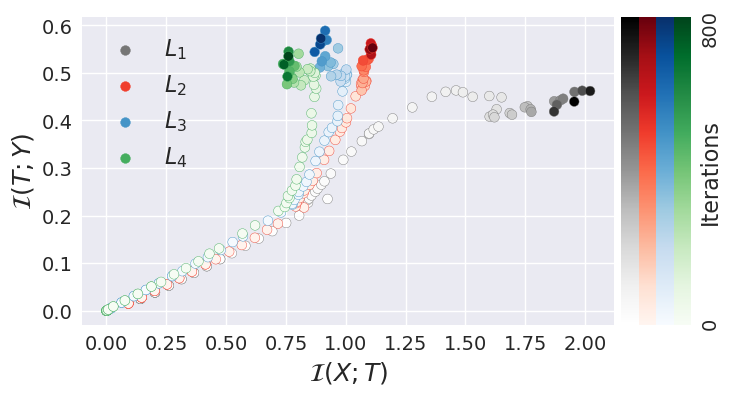

/tmp/ipykernel_17118/3338960709.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colors[idx])


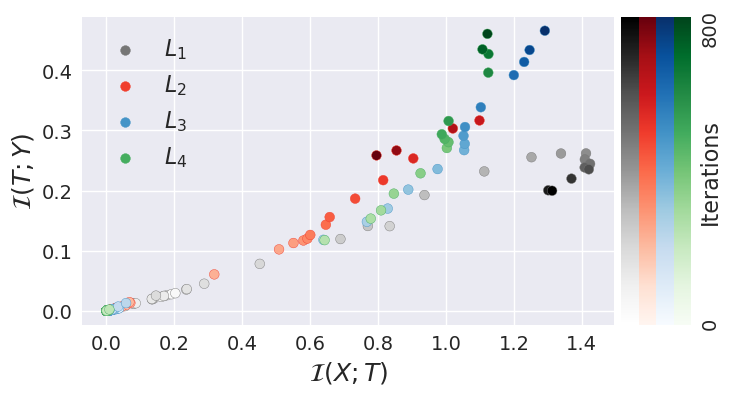

/tmp/ipykernel_17118/3338960709.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colors[idx])


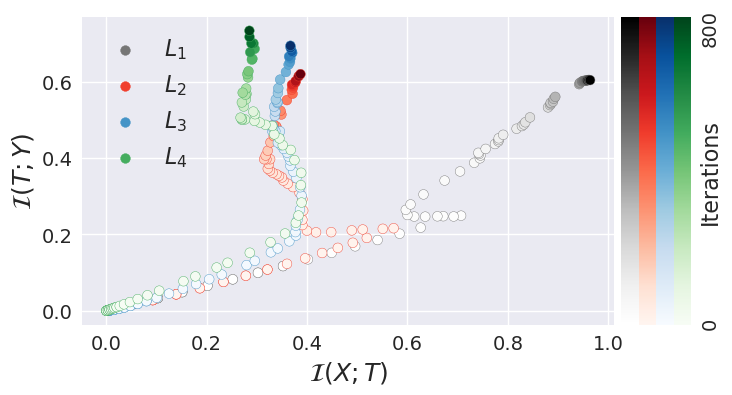

/tmp/ipykernel_17118/3338960709.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colors[idx])


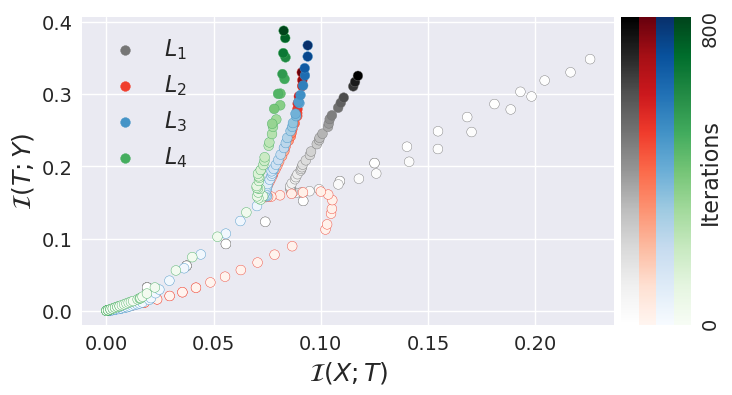

/tmp/ipykernel_17118/3338960709.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colors[idx])


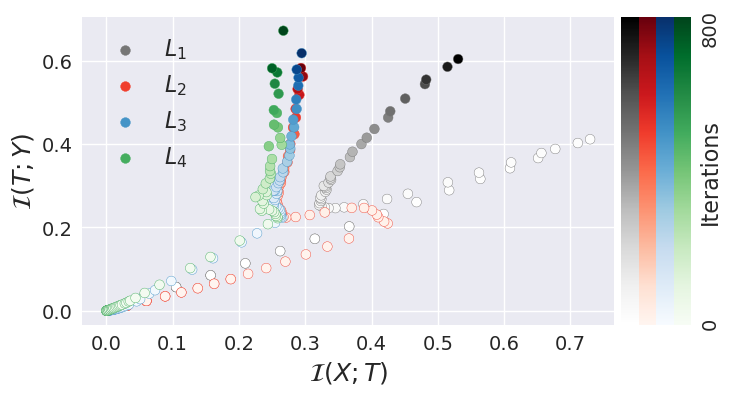

In [121]:
from IPDL import utils
from matplotlib import pyplot as plt

for key, value in exp.items():
    filename = os.path.join(data_dir, value, 'CLASS_DFU.df')
    df = pd.read_pickle(filename)
    
    labels = list(map(lambda x: '$L_{}$'.format(x), range(1, len(df.keys())//2 + 1)))
    fig = show_ip(df, n=75, labels=labels, moving_average_n=15, figsize=(7, 4))
    fig.savefig(os.path.join('figures', key + '.pdf'), bbox_inches='tight')
    plt.show(fig)
    



In [ ]:
# recorrer el dict con un for
# for key, value in exp.items():

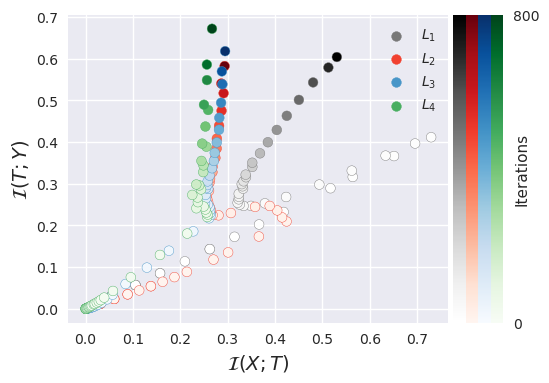

In [57]:
from IPDL import utils
from matplotlib import pyplot as plt
labels = list(map(lambda x: '$L_{}$'.format(x), range(1, len(df.keys())//2 + 1)))
fig = utils.show_ip(df, n=50, labels=labels, moving_average_n=15, figsize=(5, 4))
plt.show(fig)

In [20]:
list(map(lambda x: '$L_{}$'.format(x), range(1, len(df.keys())//2 + 1)))

['$L_1$', '$L_2$', '$L_3$', '$L_4$']